In [99]:
import pandas as pd

In [100]:
mat_nat = pd.read_csv('../data/wb_pisa_math.csv')
sci_nat = pd.read_csv('../data/wb_pisa_science.csv')
read_nat = pd.read_csv('../data/wb_pisa_reading.csv')


In [151]:
mat_nat

,Country,2006_Mean,2006_SE,2009_Mean,2009_SE,2012_Mean,2012_SE,2015_Mean,2015_SE,2018_Mean,2018_SE,2022_Mean,2022_SE,Treatment,Pandemic_Deaths_2020,Education_Spending_Percent_GDP,GDP_Per_Capita_2018,COVID_Death_Percent_Population
0,Austria,506.0,3.3,505.0,3.7,NaN,NaN,506,2.7,497,2.9,499,3.0,Yes,0.8,5.5,51.738636,0.009091
1,Canada,532.0,1.8,527.0,2.0,527.0,1.6,518,1.8,516,2.3,512,2.4,Yes,2.9,5.7,46.803235,0.007817
2,Chile,NaN,NaN,NaN,NaN,411.0,4.6,421,3.1,423,3.1,417,2.4,Yes,3.4,5.0,15.946524,0.018182
3,Colombia,NaN,NaN,NaN,NaN,370.0,3.8,381,3.2,376,2.9,391,3.0,Yes,3.1,4.5,6.861507,0.006314
4,Czech Republic,516.0,3.5,510.0,3.6,493.0,2.8,499,2.9,492,2.4,487,2.1,Yes,1.2,4.1,23.132075,0.011321
5,Denmark,514.0,2.7,513.0,2.6,503.0,2.6,500,2.3,511,2.2,489,1.9,No,1.0,4.9,60.706897,0.017241
6,Estonia,NaN,NaN,515.0,2.7,512.0,2.6,521,2.0,520,2.0,510,2.0,Yes,0.1,4.8,23.538462,0.007692
7,Finland,544.0,1.9,548.0,2.3,541.0,2.2,519,1.9,511,2.3,507,2.0,No,0.8,5.2,50.327273,0.014545
8,France,511.0,2.5,496.0,3.2,497.0,3.1,495,2.5,493,2.1,495,2.3,Yes,14.5,5.3,41.690583,0.021674
9,Germany,503.0,3.3,504.0,3.9,513.0,2.9,514,2.9,506,2.9,500,2.6,No,23.8,4.2,47.618818,0.028709


Preprocess

In [114]:
def process_gdp_files(data_dir="../data", pattern="gdp_exp_*.csv"):
    """
    Process GDP education expenditure CSV files and combine them into a single wide format dataframe.
    """
    data_path = Path(data_dir).resolve()
    dfs = []
    files = sorted(data_path.glob(pattern))
    
    if not files:
        raise FileNotFoundError(f"No files matching '{pattern}' found in {data_path}")
    
    for file in files:
        # Extract year from filename
        year = file.stem.split('_')[-1]
        
        # Debug: Print first few lines of the file
        print(f"\nDebug - First few lines of {file}:")
        with open(file, 'r') as f:
            for i, line in enumerate(f):
                if i < 5:  # Print first 5 lines
                    print(f"Line {i}: {line.strip()}")
        
        try:
            # Read CSV file
            df = pd.read_csv(
                file,
                skiprows=2,  # Skip the title and description rows
                header=0,    # Use the next row as header
                dtype={'Category': str}
            )
            
            # Rename columns
            df.columns = ['Country', f'GDP_Education_Exp_{year}']
            
            # Store the processed dataframe
            dfs.append(df)
            
            # Debug print
            print(f"\nProcessed dataframe for {year}:")
            print(df.head())
            print(f"Shape: {df.shape}")
            print(f"Columns: {df.columns}")
            print(f"Data types: {df.dtypes}")
            
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue
    
    if not dfs:
        raise ValueError("No valid data files were processed")
    
    # Start with the first dataframe
    final_df = dfs[0]
    
    # Merge all subsequent dataframes
    for df in dfs[1:]:
        final_df = final_df.merge(df, on='Country', how='outer')
        
    # Sort by country name
    final_df = final_df.sort_values('Country').reset_index(drop=True)
    
    return final_df

df_gdp_exp = process_gdp_files()


Debug - First few lines of /Users/gerardoguerrero/pol_pub2/data/gdp_exp_&_ppp.csv:
Line 0: Reference area,GDP_PPP_2007,GDP_PPP_2008,GDP_PPP_2009,GDP_PPP_2010,GDP_PPP_2011,GDP_PPP_2012,GDP_PPP_2013,GDP_PPP_2014,GDP_PPP_2015,GDP_PPP_2016,GDP_PPP_2017,GDP_PPP_2018,GDP_PPP_2019,GDP_PPP_2020,GDP_PPP_2021,GDP_PPP_2022,GDP_Education_Exp_2008,GDP_Education_Exp_2009,GDP_Education_Exp_2010,GDP_Education_Exp_2011,GDP_Education_Exp_2012,GDP_Education_Exp_2013,GDP_Education_Exp_2014,GDP_Education_Exp_2015,GDP_Education_Exp_2016,GDP_Education_Exp_2017,GDP_Education_Exp_2018,GDP_Education_Exp_2019,GDP_Education_Exp_2020
Line 1: Austria,39195.21023,41046.588773,40674.463342,41751.770355,44187.934579,46176.661052,47534.358331,48369.190925,49624.985137,52379.036736,53885.119966,56654.565353,60370.444015,58523.131078,63606.453145,71014.499891,,,,,2.993731,3.071253,2.979963,2.980174,2.988191,2.941086,2.827367,2.800769,2.9595871
Line 2: Canada,39575.492232,40376.111571,38864.049261,40098.303365,41666.8486

In [115]:
df_gdp_exp

,Country,GDP_Education_Exp_2008,GDP_Education_Exp_2009,GDP_Education_Exp_2010,GDP_Education_Exp_2011,GDP_Education_Exp_2012,GDP_Education_Exp_2013,GDP_Education_Exp_2014,GDP_Education_Exp_2015,GDP_Education_Exp_2016,GDP_Education_Exp_2017,GDP_Education_Exp_2018,GDP_Education_Exp_2019,GDP_Education_Exp_2020
0,Argentina,3.561938,4.022185,3.636445,3.825775,3.854837,3.886624,3.832981,4.048630,3.866413,3.720780,3.207986,3.215841,3.365386
1,Australia,3.169325,3.558342,3.788551,3.489743,3.295539,3.257943,3.206929,3.181980,3.193161,3.231380,3.307333,3.421575,3.685792
2,Austria,NaN,NaN,NaN,NaN,2.993731,3.071253,2.979963,2.980174,2.988191,2.941086,2.827367,2.800769,2.959587
3,Belgium,4.143592,4.152045,4.142179,4.129149,4.176546,4.183889,4.121513,4.053206,4.044523,4.010449,3.975536,3.905924,4.249168
4,Brazil,3.958460,4.129032,4.021223,4.183313,4.167510,4.151693,4.021600,4.064267,4.112799,3.975799,3.900780,3.801672,3.569043
5,Bulgaria,NaN,NaN,NaN,NaN,1.662444,1.815480,1.884080,1.751722,1.754837,1.790996,1.895394,2.036830,2.278072
6,Canada,3.209979,3.324768,3.539711,3.414058,3.339135,3.265116,3.197652,3.170711,3.259800,3.259545,3.221834,3.181777,3.356964
7,Chile,2.802036,3.031165,2.673376,2.632025,2.929083,2.646546,2.466476,2.630576,2.994949,3.000646,3.023450,3.130065,3.128601
8,Colombia,3.916961,3.506992,3.281409,3.111201,3.019483,3.291633,3.093037,3.123892,3.065175,3.152782,3.204235,3.432741,4.114330
9,Costa Rica,3.446523,4.359462,4.820263,4.587046,4.754158,4.701076,4.659144,4.847132,4.551488,NaN,3.882851,4.714241,4.387170


In [116]:
gdp_per_capita = pd.read_csv('../data/gdp_per_capita.csv')

In [117]:
gdp_per_capita.drop(columns=['STRUCTURE','STRUCTURE_ID','STRUCTURE_NAME','FREQ','ACTION','Frequency of observation','REF_AREA','SECTOR','Counterpart institutional sector','Institutional sector', 'COUNTERPART_SECTOR',
       'TRANSACTION', 'Transaction', 'INSTR_ASSET',
       'Financial instruments and non-financial assets', 'ACTIVITY',
       'Economic activity', 'EXPENDITURE', 'Expenditure', 'UNIT_MEASURE',
       'Unit of measure', 'PRICE_BASE', 'Price base', 'TRANSFORMATION',
       'Transformation', 'TABLE_IDENTIFIER', 'Table identifier','Time period','Observation value','REF_YEAR_PRICE','Price reference year','Confidentiality status','Decimals','DECIMALS','Observation status', 'UNIT_MULT', 'Unit multiplier',
       'CURRENCY', 'Currency','OBS_STATUS','CONF_STATUS'], inplace=True)
gdp_per_capita.sort_values(by=['Reference area','TIME_PERIOD'], inplace=True)
gdp_per_capita.reset_index(drop=True, inplace=True)
gdp_per_capita.to_csv('../data/gdp_per_capita_preprocessed.csv', index=False)

In [118]:
def format_gdp_data(df):
    # Pivot the data to create year columns
    df_pivot = df.pivot(
        index='Reference area',
        columns='TIME_PERIOD',
        values='OBS_VALUE'
    )
    
    # Rename columns to desired format
    df_pivot.columns = [f'GDP_PPP_{year}' for year in df_pivot.columns]
    
    # Reset index to make country names a regular column
    df_pivot.reset_index(inplace=True)
    
    return df_pivot

# Read the CSV data
df = pd.read_csv('../data/gdp_per_capita_preprocessed.csv')

# Apply the formatting function
df_gdp_ppp = format_gdp_data(df)

In [119]:
df_gdp_ppp.head(20)

,Reference area,GDP_PPP_2007,GDP_PPP_2008,GDP_PPP_2009,GDP_PPP_2010,GDP_PPP_2011,GDP_PPP_2012,GDP_PPP_2013,GDP_PPP_2014,GDP_PPP_2015,GDP_PPP_2016,GDP_PPP_2017,GDP_PPP_2018,GDP_PPP_2019,GDP_PPP_2020,GDP_PPP_2021,GDP_PPP_2022
0,Albania,7284.989240,8228.360546,8812.783475,9627.080037,10207.740986,10526.277348,10571.021659,11259.216046,11658.911771,12078.871704,12771.011634,13498.187474,14618.338927,14407.774428,NaN,NaN
1,Argentina,16731.384195,17571.533887,16472.715244,18066.499130,19322.227130,19629.898035,20108.205697,19649.352888,20058.338641,20248.721388,23514.667098,24498.378921,23535.012750,22290.563043,26050.657854,29112.800407
2,Australia,39703.469623,40136.068860,41684.568650,42823.927966,44460.605016,43911.683304,47796.022174,47648.633963,47266.591718,50152.476571,50761.909452,53125.903609,53681.424509,56905.500543,64120.473853,71753.645427
3,Austria,39195.210230,41046.588773,40674.463342,41751.770355,44187.934579,46176.661052,47534.358331,48369.190925,49624.985137,52379.036736,53885.119966,56654.565353,60370.444015,58523.131078,63606.453145,71014.499891
4,Belgium,36799.551299,37883.233422,37885.895654,39844.362909,41244.706461,42483.621887,43864.147826,45147.489111,46071.876832,48414.638613,50255.854035,52466.553021,56712.355972,56119.616238,61873.441744,69456.953283
5,Brazil,12639.928746,13399.986553,13328.167147,14363.566322,15109.737403,15087.820528,15602.383358,15699.224510,14690.312937,14174.002060,14406.390934,15286.655168,15864.007757,15866.290068,17756.475861,NaN
6,Bulgaria,12630.721085,14100.691874,13917.751595,14680.598971,15747.416423,16419.449230,16893.870117,17990.731889,18896.207402,20745.909179,22317.370294,24053.881806,26815.089890,27376.925200,31219.793760,35586.341803
7,Cabo Verde,5566.775220,6010.851495,5900.660808,6038.579163,6384.234699,6318.061029,6367.279983,6416.839243,6773.493409,7350.746416,7935.761763,7916.421154,8645.756468,6852.570042,7685.419214,NaN
8,Cameroon,2715.408122,2769.216909,2780.606516,2817.542000,2892.502629,2963.449591,3139.895689,3328.397747,3417.404842,3555.323525,3700.351414,3945.611437,4180.483815,4313.583273,NaN,NaN
9,Canada,39575.492232,40376.111571,38864.049261,40098.303365,41666.848683,42291.886605,44300.991977,45758.133114,44668.065118,46470.675161,48317.404026,49982.649045,50498.963113,48590.716417,55781.702620,62041.556862


In [120]:
import pandas as pd

def merge_gdp_dataframes(df_ppp, df_exp):
    # Clean up country names in df_exp
    df_exp = df_exp.rename(columns={'Country': 'Reference area'})
    
    # Replace some known differences in country names
    country_mapping = {
        'Slovak Rep.': 'Slovak Republic',
        'Türkiye': 'Türkiye',  # Keep as is since it matches
        'Korea': 'Korea',  # This might need adjustment depending on the exact name in df_ppp
        'G20': None,  # Remove this row as it's not a country
        'OECD - Average': None  # Remove this row as it's not a country
    }
    
    # Apply the mapping
    df_exp['Reference area'] = df_exp['Reference area'].replace(country_mapping)
    
    # Remove rows where Reference area is None
    df_exp = df_exp.dropna(subset=['Reference area'])
    
    # Merge the dataframes on the country column
    merged_df = pd.merge(
        df_ppp,
        df_exp,
        on='Reference area',
        how='outer'  # Use outer join to keep all countries from both dataframes
    )
    
    # Sort columns so PPP columns come first, followed by Education columns
    ppp_cols = [col for col in merged_df.columns if 'GDP_PPP' in col]
    edu_cols = [col for col in merged_df.columns if 'GDP_Education_Exp' in col]
    
    # Reorder columns with Reference area first, then PPP, then Education
    ordered_cols = ['Reference area'] + ppp_cols + edu_cols
    merged_df = merged_df[ordered_cols]
    
    return merged_df

# Create merged dataframe
merged_gdp = merge_gdp_dataframes(df_gdp_ppp, df_gdp_exp)

In [121]:
merged_gdp

,Reference area,GDP_PPP_2007,GDP_PPP_2008,GDP_PPP_2009,GDP_PPP_2010,GDP_PPP_2011,GDP_PPP_2012,GDP_PPP_2013,GDP_PPP_2014,GDP_PPP_2015,...,GDP_Education_Exp_2011,GDP_Education_Exp_2012,GDP_Education_Exp_2013,GDP_Education_Exp_2014,GDP_Education_Exp_2015,GDP_Education_Exp_2016,GDP_Education_Exp_2017,GDP_Education_Exp_2018,GDP_Education_Exp_2019,GDP_Education_Exp_2020
0,Albania,7284.989240,8228.360546,8812.783475,9627.080037,10207.740986,10526.277348,10571.021659,11259.216046,11658.911771,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,16731.384195,17571.533887,16472.715244,18066.499130,19322.227130,19629.898035,20108.205697,19649.352888,20058.338641,...,3.825775,3.854837,3.886624,3.832981,4.048630,3.866413,3.720780,3.207986,3.215841,3.365386
2,Australia,39703.469623,40136.068860,41684.568650,42823.927966,44460.605016,43911.683304,47796.022174,47648.633963,47266.591718,...,3.489743,3.295539,3.257943,3.206929,3.181980,3.193161,3.231380,3.307333,3.421575,3.685792
3,Austria,39195.210230,41046.588773,40674.463342,41751.770355,44187.934579,46176.661052,47534.358331,48369.190925,49624.985137,...,NaN,2.993731,3.071253,2.979963,2.980174,2.988191,2.941086,2.827367,2.800769,2.959587
4,Belgium,36799.551299,37883.233422,37885.895654,39844.362909,41244.706461,42483.621887,43864.147826,45147.489111,46071.876832,...,4.129149,4.176546,4.183889,4.121513,4.053206,4.044523,4.010449,3.975536,3.905924,4.249168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Switzerland,50589.665305,53498.013101,52730.633070,54333.768818,57515.245822,59448.152436,61657.922030,63417.871754,65207.021164,...,3.129102,3.301842,3.326131,3.273277,3.163403,3.167287,3.163306,3.085314,3.138599,NaN
59,Türkiye,14866.449971,16038.223712,15442.154612,17343.712873,19590.863737,20627.437456,22373.132678,24104.986601,25855.908908,...,2.379362,2.492106,2.520679,2.538275,2.498679,2.632946,2.412841,2.452061,2.705231,2.435077
60,United Kingdom,35525.293924,36734.676772,35031.900055,36491.346386,37208.971903,38336.604981,39947.538393,41266.848849,42515.274630,...,3.709077,3.689777,4.029587,4.189626,3.843116,3.690457,3.624579,3.394155,3.439377,3.700649
61,United States,47976.201209,48498.445211,47122.988543,48570.292959,49951.910854,51644.991659,53234.740570,55094.126739,56796.897362,...,3.436426,3.289182,3.202607,3.175277,3.188267,3.220155,3.249475,3.221397,3.214939,3.294661


In [63]:
merged_gdp.to_csv('../data/gdp_exp_&_ppp.csv', index=False)

In [122]:
countries = set(read_nat['Country'])

In [123]:
more_countries = set(merged_gdp['Reference area'].unique())

In [124]:
more_countries

{'Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Cameroon',
 'Canada',
 'Chile',
 'China (People’s Republic of)',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hong Kong (China)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malta',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'United Kingdom',
 'United States',
 'Zambia'}

In [125]:
countries.add('Czechia')

In [126]:
gdp_exp_and_pp = merged_gdp[merged_gdp['Reference area'].isin(countries)]
gdp_exp_and_pp.to_csv('../data/gdp_exp_&_ppp.csv', index=False)

In [127]:
gdp_exp_and_pp

,Reference area,GDP_PPP_2007,GDP_PPP_2008,GDP_PPP_2009,GDP_PPP_2010,GDP_PPP_2011,GDP_PPP_2012,GDP_PPP_2013,GDP_PPP_2014,GDP_PPP_2015,...,GDP_Education_Exp_2011,GDP_Education_Exp_2012,GDP_Education_Exp_2013,GDP_Education_Exp_2014,GDP_Education_Exp_2015,GDP_Education_Exp_2016,GDP_Education_Exp_2017,GDP_Education_Exp_2018,GDP_Education_Exp_2019,GDP_Education_Exp_2020
3,Austria,39195.210230,41046.588773,40674.463342,41751.770355,44187.934579,46176.661052,47534.358331,48369.190925,49624.985137,...,NaN,2.993731,3.071253,2.979963,2.980174,2.988191,2.941086,2.827367,2.800769,2.959587
9,Canada,39575.492232,40376.111571,38864.049261,40098.303365,41666.848683,42291.886605,44300.991977,45758.133114,44668.065118,...,3.414058,3.339135,3.265116,3.197652,3.170711,3.259800,3.259545,3.221834,3.181777,3.356964
10,Chile,16771.182748,16449.614266,16028.549544,18041.314313,20235.570348,21458.812331,22295.740021,22650.712398,22563.582179,...,2.632025,2.929083,2.646546,2.466476,2.630576,2.994949,3.000646,3.023450,3.130065,3.128601
12,Colombia,10228.188007,10651.506633,10720.914286,11206.221832,12108.234854,12530.807654,13266.002148,13777.241959,13762.750912,...,3.111201,3.019483,3.291633,3.093037,3.123892,3.065175,3.152782,3.204235,3.432741,4.114330
16,Czechia,26207.845723,27817.062758,27573.257049,28042.302009,29235.560699,29476.587500,31048.122456,32810.686828,34217.975632,...,2.453234,2.486302,2.415625,2.390923,2.408261,2.278536,2.436761,2.684517,2.924605,3.122060
17,Denmark,39118.963207,41474.145014,40506.924302,43044.876027,44446.578090,44761.579789,46883.131074,47880.687634,48906.109829,...,4.133907,4.513423,4.445553,4.674357,NaN,3.829105,3.733292,3.697377,3.652360,3.698459
18,Estonia,22164.669641,22781.183415,20460.095802,21587.112349,24610.451711,26192.961132,27784.711585,29375.589870,29760.313510,...,3.239097,3.149691,3.097016,2.618870,2.711455,2.691220,2.762699,2.954122,3.048966,3.161783
19,Finland,37844.446396,40081.225921,37968.445255,38950.213166,40845.765750,40738.873438,41325.582876,41539.598953,42250.407743,...,3.858106,3.887309,3.878606,3.887987,3.936406,3.819765,3.587321,3.581989,3.699126,3.818289
20,France,34196.533960,35192.053589,34809.904581,36065.758128,37675.402351,37841.735437,39772.372030,40395.672439,41049.722877,...,3.468539,3.443588,3.430057,3.432445,3.391426,3.371855,3.393905,3.362569,3.343979,3.531127
22,Germany,37496.177323,39084.285618,38216.703187,40469.325876,43398.326075,44229.318933,45888.787920,47938.520790,48545.172477,...,2.794813,2.726310,2.710730,2.678556,2.627931,2.600421,2.595507,2.628940,2.696213,2.905603


In [152]:
teaching_time = pd.read_csv('../data/teaching_time.csv')

In [153]:
teaching_time.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'INST_TYPE_EDU', 'Type of educational institution',
       'EDUCATION_LEV', 'Education level', 'PERS_TYPE', 'Type of personnel',
       'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value',
       'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier',
       'STATISTICAL_OPERATION', 'Statistical operation', 'DECIMALS',
       'Decimals'],
      dtype='object')

In [154]:
teaching_time.drop(columns=['STRUCTURE','STRUCTURE_ID','STRUCTURE_NAME','ACTION','REF_AREA','UNIT_MEASURE',
       'Unit of measure','OBS_STATUS','MEASURE','Measure','INST_TYPE_EDU','Type of educational institution','EDUCATION_LEV','Type of personnel','Time period',
       'UNIT_MULT', 'Unit multiplier',
       'STATISTICAL_OPERATION', 'Statistical operation', 'DECIMALS', 'Decimals','PERS_TYPE','Observation value','Observation status'
       ], inplace=True)


In [155]:
teaching_time.head

<bound method NDFrame.head of      Reference area                    Education level  TIME_PERIOD  \
0             Chile                  Primary education         2007   
1             Chile                  Primary education         2008   
2             Chile                  Primary education         2009   
3             Chile                  Primary education         2010   
4             Chile                  Primary education         2011   
...             ...                                ...          ...   
1480          Spain  Upper secondary general education         2017   
1481          Spain  Upper secondary general education         2018   
1482          Spain  Upper secondary general education         2019   
1483          Spain  Upper secondary general education         2020   
1484          Spain  Upper secondary general education         2021   

       OBS_VALUE  
0     1086.84706  
1     1101.22356  
2     1108.79783  
3     1104.79325  
4     1119.98218  
...

In [150]:
def reshape_education_hours(df):
    """
    Reshape education hours data from long to wide format.
    
    Args:
        df: DataFrame with columns ['Reference area', 'Education level', 'TIME_PERIOD', 'OBS_VALUE']
    
    Returns:
        DataFrame in wide format with countries as rows and education level-years as columns
    """
    # Clean up education level names to make them suitable for column names
    df['Education level'] = (df['Education level']
        .str.lower()
        .str.replace(' education', '')
        .str.replace(' ', '_'))
    
    # Create wide format using pivot
    wide_df = df.pivot(
        index='Reference area',
        columns=['Education level', 'TIME_PERIOD'],
        values='OBS_VALUE'
    )
    
    # Flatten column names and format them properly
    wide_df.columns = [f"{level}_{year}_hours" 
                      for level, year in wide_df.columns]
    
    # Reset index to make country a regular column
    wide_df = wide_df.reset_index().rename(columns={'Reference area': 'Country'})
    
    # Sort columns (except Country) to ensure chronological order
    columns_to_sort = wide_df.columns[1:].tolist()
    sorted_columns = sorted(columns_to_sort)
    wide_df = wide_df[['Country'] + sorted_columns]
    
    return wide_df

wide_format_df = reshape_education_hours(teaching_time)
wide_format_df.to_csv('../data/teaching_time_preprocessed.csv', index=False)


In [168]:
teaching_staff_ratio.columns

Index(['Reference area', 'Education level', 'Measure', 'Education type',
       'EDUCATION_FIELD', 'Field of education', 'GRADE', 'Grade', 'FREQ',
       'TIME_PERIOD', 'OBS_VALUE'],
      dtype='object')

In [169]:
teaching_staff_ratio = pd.read_csv('../data/teaching_staff_ratio.csv')
teaching_staff_ratio.drop(columns=['STRUCTURE','STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA','EDUCATION_LEV','MEASURE','CONF_STATUS',
       'Confidentiality status', 'COMMENT_OBS', 'Observation comment',
       'DECIMALS', 'Decimals', 'TIME_PER_COLLECT', 'Time period collection',
       'UNIT_MULT', 'Unit multiplier','REF_YEAR_AGES', 'Reference date for ages',
       'ORIGIN_CRITERION', 'Origin criterion', 'REPYEARSTART',
       'Reference year start', 'REPYEAREND', 'Reference year end',
       'OBS_STATUS', 'Observation status','Observation value','Time period','Sex','Age','SEX','AGE','EDUCATION_TYPE','INTENSITY','Intensity',
       'Frequency of observation', 'ORIGIN', 'Origin', 'DESTINATION',
       'Destination', 'INST_TYPE_EDU', 'Type of educational institution',
       'MOBILITY', 'Mobility', 'UNIT_MEASURE', 'Unit of measure', 'Measure','Education type','EDUCATION_FIELD','Field of education','GRADE','Grade','FREQ'
       ],inplace=True)
teaching_staff_ratio


,Reference area,Education level,TIME_PERIOD,OBS_VALUE
0,Ireland,Upper secondary education,2020,12.41830
1,Ireland,Upper secondary education,2015,13.87066
2,Latvia,Upper secondary education,2022,12.56929
3,Slovenia,Lower secondary education,2020,NaN
4,United Kingdom,Primary education,2017,16.89465
...,...,...,...,...
892,Israel,Primary education,2019,15.09505
893,Israel,Primary education,2018,15.43439
894,Portugal,Upper secondary education,2021,10.51182
895,Greece,Lower secondary education,2017,NaN


In [176]:
teaching_staff_ratio[teaching_staff_ratio['Reference area'] == 'Austria']

,Reference area,Education level,TIME_PERIOD,OBS_VALUE
234,Austria,Lower secondary education,2022,8.571602
235,Austria,Lower secondary education,2021,8.733172
236,Austria,Lower secondary education,2020,8.636123
237,Austria,Lower secondary education,2019,8.543038
238,Austria,Lower secondary education,2018,8.499137
239,Austria,Lower secondary education,2017,8.564764
240,Austria,Lower secondary education,2016,8.639338
241,Austria,Lower secondary education,2015,8.729805
242,Austria,Lower secondary education,2014,8.816582
243,Austria,Lower secondary education,2013,8.983603


In [194]:
df = pd.DataFrame(teaching_staff_ratio)

# Create the column names by combining Education level and TIME_PERIOD
df['column_name'] = df['Education level'].str.lower().str.replace(' ', '_') + '_' + df['TIME_PERIOD'].astype(str)

# Use pivot_table instead of pivot, and specify which values to include
wide_df = pd.pivot_table(
    df,
    index='Reference area',
    columns='column_name',
    values='OBS_VALUE',
    fill_value=None,  # This will keep NaN values as NaN
    aggfunc='first'   # In case of duplicates, take the first value
).reset_index()

# Rename the 'Reference area' column to 'Country'
wide_df = wide_df.rename(columns={'Reference area': 'Country'})

# Only keep columns that have at least one non-NaN value
wide_df = wide_df.dropna(axis=1, how='all')

In [196]:
wide_df.to_csv('../data/teaching_staff_ratio_preprocessed.csv', index=False)

In [207]:
ict_access = pd.read_csv('../data/ict_access_pct_pop.csv')
ict_access.drop(columns=['STRUCTURE','STRUCTURE_ID','STRUCTURE_NAME','FREQ','ACTION','Frequency of observation','REF_AREA', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'GEO_AREA', 'Geographical area', 'AGE', 'Age', 'SEX', 'EDUCATION_LEVEL', 'Education level', 'INCOME_GROUP',
       'Income group', 'EMP_STATUS', 'Employment status','Time period',  'Observation value', 'OBS_STATUS', 'Observation status', 'OBS_STATUS_2',
       'Observation status 2', 'OBS_STATUS_3', 'Observation status 3',
       'UNIT_MULT', 'Unit multiplier', 'TIME_HORIZON_USE', 'Time horizon',
       'DECIMALS', 'Decimals', 'BREAKDOWN_V7_HH', 'V7 Breakdowns households',
       'Sex'],inplace=True)
ict_access.columns

Index(['Reference area', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

In [214]:
ict_access['Reference area'].unique()

array(['Ireland', 'Luxembourg', 'Italy', 'Portugal', 'Lithuania',
       'Austria', 'Finland', 'Netherlands', 'Denmark', 'Slovenia',
       'Latvia', 'Spain', 'Hungary', 'Norway', 'Korea', 'Greece',
       'Slovak Republic', 'France', 'Chile', 'Czechia', 'Estonia',
       'United Kingdom', 'Sweden', 'Germany'], dtype=object)

In [209]:
# Rename columns for clarity first (if needed)
df_cleaned = ict_access.rename(columns={
    'Reference area': 'Country',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Value'
})

# Pivot the dataframe to wide format
ict_access_wide = df_cleaned.pivot(
    index='Country',
    columns='Year',
    values='Value'
)

# Reset index to make Country a regular column
ict_access_wide = ict_access_wide.reset_index()

# Rename columns to match desired format
ict_access_wide.columns.name = None  # Remove columns name
new_columns = {
    year: f'ict_access_pct_pop_{year}' 
    for year in ict_access_wide.columns if year != 'Country'
}
ict_access_wide = ict_access_wide.rename(columns=new_columns)

# Optional: Sort by Country
ict_access_wide = ict_access_wide.sort_values('Country')

In [210]:
ict_access_wide

,Country,ict_access_pct_pop_2012,ict_access_pct_pop_2013,ict_access_pct_pop_2014,ict_access_pct_pop_2015,ict_access_pct_pop_2016,ict_access_pct_pop_2017,ict_access_pct_pop_2018,ict_access_pct_pop_2019,ict_access_pct_pop_2020,ict_access_pct_pop_2021,ict_access_pct_pop_2022
0,Austria,100.0000,99.80350,99.180200,100.000000,99.831800,99.804000,98.66440,99.073700,98.976300,100.000000,100.000000
1,Chile,99.6200,95.29000,98.291463,97.844989,99.611882,99.586742,NaN,NaN,NaN,NaN,NaN
2,Czechia,95.5885,96.35640,99.879600,98.976700,98.578200,99.691400,99.73400,98.999100,100.000000,100.000000,100.000000
3,Denmark,99.6026,99.66460,100.000000,99.796700,100.000000,100.000000,100.00000,98.950600,99.736000,99.732500,99.358000
4,Estonia,99.6445,99.18110,100.000000,100.000000,100.000000,99.661300,99.61620,99.443900,99.473900,99.725600,99.177600
5,Finland,99.6342,99.60810,99.698200,98.967100,100.000000,99.683300,100.00000,100.000000,100.000000,100.000000,100.000000
6,France,98.9627,98.47500,98.122300,97.850000,98.341200,98.123500,96.13090,97.649800,NaN,98.402500,98.906400
7,Germany,99.2189,99.28810,99.261400,99.286300,99.600000,99.370000,99.62270,99.462100,99.250500,98.492400,97.576300
8,Greece,98.4419,96.29280,99.420500,97.727300,98.882200,99.573400,97.89640,99.401000,98.849500,100.000000,98.648200
9,Hungary,97.6124,98.62160,99.310300,98.170200,100.000000,99.412800,98.57090,99.319700,99.217800,99.408500,98.662700


In [216]:
# If Canada isn't in the dataframe yet, add it
if 'Canada' not in ict_access_wide['Country'].values:
    canada_data = {
        'Country': 'Canada',
        'ict_access_pct_pop_2018': 98.60,
        'ict_access_pct_pop_2020': 98.20,
        'ict_access_pct_pop_2022': 99.10
    }
    
    # Add NaN for any other years that exist in your dataframe
    years = [col.split('_')[-1] for col in ict_access_wide.columns if col != 'Country']
    for year in years:
        if f'ict_access_pct_pop_{year}' not in canada_data:
            canada_data[f'ict_access_pct_pop_{year}'] = float('nan')
    
    # Append Canada to the dataframe
    ict_access_wide = pd.concat([ict_access_wide, pd.DataFrame([canada_data])], ignore_index=True)
    
    # Sort by Country again to maintain order
    ict_access_wide = ict_access_wide.sort_values('Country')
    ict_access_wide = ict_access_wide.reset_index(drop=True)
    
ict_access_wide

,Country,ict_access_pct_pop_2012,ict_access_pct_pop_2013,ict_access_pct_pop_2014,ict_access_pct_pop_2015,ict_access_pct_pop_2016,ict_access_pct_pop_2017,ict_access_pct_pop_2018,ict_access_pct_pop_2019,ict_access_pct_pop_2020,ict_access_pct_pop_2021,ict_access_pct_pop_2022
0,Austria,100.0000,99.80350,99.180200,100.000000,99.831800,99.804000,98.66440,99.073700,98.976300,100.000000,100.000000
1,Canada,NaN,NaN,NaN,NaN,NaN,NaN,98.60000,NaN,98.200000,NaN,99.100000
2,Chile,99.6200,95.29000,98.291463,97.844989,99.611882,99.586742,NaN,NaN,NaN,NaN,NaN
3,Czechia,95.5885,96.35640,99.879600,98.976700,98.578200,99.691400,99.73400,98.999100,100.000000,100.000000,100.000000
4,Denmark,99.6026,99.66460,100.000000,99.796700,100.000000,100.000000,100.00000,98.950600,99.736000,99.732500,99.358000
5,Estonia,99.6445,99.18110,100.000000,100.000000,100.000000,99.661300,99.61620,99.443900,99.473900,99.725600,99.177600
6,Finland,99.6342,99.60810,99.698200,98.967100,100.000000,99.683300,100.00000,100.000000,100.000000,100.000000,100.000000
7,France,98.9627,98.47500,98.122300,97.850000,98.341200,98.123500,96.13090,97.649800,NaN,98.402500,98.906400
8,Germany,99.2189,99.28810,99.261400,99.286300,99.600000,99.370000,99.62270,99.462100,99.250500,98.492400,97.576300
9,Greece,98.4419,96.29280,99.420500,97.727300,98.882200,99.573400,97.89640,99.401000,98.849500,100.000000,98.648200


In [228]:
ict_access_wide.to_csv('../data/ict_access_pct_pop_preprocessed.csv', index=False)

In [224]:
gini_coef = pd.read_csv('../data/gini_coef.csv')
gini_coef.columns
gini_coef.drop(columns=['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'STATISTICAL_OPERATION', 'Statistical operation',
       'UNIT_MEASURE', 'Unit of measure', 'AGE', 'Age', 'METHODOLOGY',
       'Methodology', 'DEFINITION', 'Definition', 'POVERTY_LINE', 'Time period','Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT',
       'Unit multiplier', 'CURRENCY', 'Currency', 'DECIMALS', 'Decimals',
       'PRICE_BASE', 'Price base', 'BASE_PER', 'Base period', 'CONF_STATUS',
       'Confidentiality status',
       'Poverty line'],inplace = True)
gini_coef.head

<bound method NDFrame.head of     Reference area  TIME_PERIOD  OBS_VALUE
0          Estonia         2020      0.305
1          Estonia         2021      0.321
2          Estonia         2013      0.356
3          Estonia         2014      0.346
4          Estonia         2015      0.330
..             ...          ...        ...
383         Greece         2009      0.330
384         Greece         2010      0.336
385         Greece         2011      0.333
386         Greece         2012      0.338
387         Greece         2013      0.342

[388 rows x 3 columns]>

In [225]:
# Rename columns for clarity first (if needed)
df_cleaned = gini_coef.rename(columns={
    'Reference area': 'Country',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Value'
})

# Pivot the dataframe to wide format
gini_wide = df_cleaned.pivot(
    index='Country',
    columns='Year',
    values='Value'
)

# Reset index to make Country a regular column
gini_wide = gini_wide.reset_index()

# Rename columns to match desired format
gini_wide.columns.name = None  # Remove columns name
new_columns = {
    year: f'gini_coef_{year}' 
    for year in gini_wide.columns if year != 'Country'
}
gini_wide = gini_wide.rename(columns=new_columns)

# Sort by Country
gini_wide = gini_wide.sort_values('Country')

In [227]:
gini_wide.to_csv('../data/gini_coef_preprocessed.csv', index=False)

---
---

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def prepare_clean_data(math_df, science_df, reading_df):
    def clean_treatment(x):
        if pd.isna(x):
            return np.nan
        return 1 if x == 'Yes' else 0
    
    base_data = pd.DataFrame({
        'country': math_df['Country'],
        'treatment': math_df['ict_national'].apply(clean_treatment),
        'gdp': np.log(math_df['GDP_2018_USD']),
        'population': np.log(math_df['Population_2018'])
    })
    
    # Eliminar países sin información clara de tratamiento
    base_data = base_data.dropna(subset=['treatment'])
    valid_countries = base_data['country'].tolist()
    
    # Filtrar los dataframes originales
    math_df = math_df[math_df['Country'].isin(valid_countries)]
    science_df = science_df[science_df['Country'].isin(valid_countries)]
    reading_df = reading_df[reading_df['Country'].isin(valid_countries)]
    
    # Crear dataframe largo
    years = ['2006', '2009', '2012', '2015', '2018', '2022']
    data_long = []
    
    for year in years:
        year_data = pd.DataFrame({
            'country': base_data['country'],
            'year': int(year),
            'math_score': math_df[f'{year}_Mean'],
            'science_score': science_df[f'{year}_Mean'],
            'reading_score': reading_df[f'{year}_Mean'],
            'treatment': base_data['treatment'],
            'gdp': base_data['gdp'],
            'population': base_data['population']
        })
        data_long.append(year_data)
    
    data_long = pd.concat(data_long, ignore_index=True)
    
    # Eliminar filas con valores faltantes
    data_long = data_long.dropna()
    
    # Normalizar scores
    for col in ['math_score', 'science_score', 'reading_score']:
        data_long[col] = (data_long[col] - data_long[col].mean()) / data_long[col].std()
    
    # Crear score combinado
    data_long['combined_score'] = data_long[['math_score', 'science_score', 'reading_score']].mean(axis=1)
    
    # Variables DiD
    data_long['post'] = (data_long['year'] >= 2020).astype(int)
    data_long['did'] = data_long['treatment'] * data_long['post']
    
    return data_long

def run_did_analysis(data):
    # Verificar que no hay valores faltantes
    if data.isnull().any().any():
        raise ValueError("Hay valores faltantes en los datos")
        
    # Preparar variables para el modelo
    X = pd.DataFrame({
        'treatment': data['treatment'],
        'post': data['post'],
        'did': data['did'],
        'gdp': data['gdp'],
        'population': data['population'],
        'constant': 1
    })
    
    outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']
    results = {}
    
    for outcome in outcomes:
        model = sm.OLS(data[outcome], X)
        results[outcome] = model.fit(cov_type='cluster', 
                                   cov_kwds={'groups': data['country']})
    
    return results

# Ejecutar análisis
clean_data = prepare_clean_data(mat_nat, sci_nat, read_nat)
did_results = run_did_analysis(clean_data)

# Mostrar resultados
def display_results(results):
    for outcome, result in results.items():
        print(f"\nResultados para {outcome}:")
        print(result.summary().tables[1])
        
display_results(did_results)


Resultados para combined_score:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.1805      0.289      0.624      0.532      -0.386       0.747
post          -0.1430      0.088     -1.630      0.103      -0.315       0.029
did            0.1395      0.114      1.225      0.221      -0.084       0.363
gdp            1.0286      0.374      2.751      0.006       0.296       1.761
population    -1.1899      0.433     -2.746      0.006      -2.039      -0.340
constant      -3.3089      1.353     -2.446      0.014      -5.960      -0.658

Resultados para math_score:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment      0.4117      0.351      1.173      0.241      -0.276       1.099
post          -0.1923      0.145     -1.325      0.185      -0.477   


=== Resultados para grupo medio ===

Outcome: combined_score
Coeficiente DiD: 0.023409628989028874
Error estándar: 0.14383837565979704
P-valor: 0.8707156423161719

Outcome: math_score
Coeficiente DiD: 0.2856978165642037
Error estándar: 0.2261837440532934
P-valor: 0.20654509506339513

Outcome: science_score
Coeficiente DiD: -0.10479261661850303
Error estándar: 0.2507363711874494
P-valor: 0.6759914011564453

Outcome: reading_score
Coeficiente DiD: -0.11067631297861408
Error estándar: 0.3098498088711474
P-valor: 0.7209470113597811

=== Resultados para grupo bajo ===

Outcome: combined_score
Coeficiente DiD: 0.0919241687624118
Error estándar: 0.15562804451831927
P-valor: 0.5547443442892703

Outcome: math_score
Coeficiente DiD: 0.11189733131085056
Error estándar: 0.2345771777593349
P-valor: 0.6333499260361848

Outcome: science_score
Coeficiente DiD: 0.30976643830531164
Error estándar: 0.20155767807363364
P-valor: 0.124326982741345

Outcome: reading_score
Coeficiente DiD: -0.145891263328926

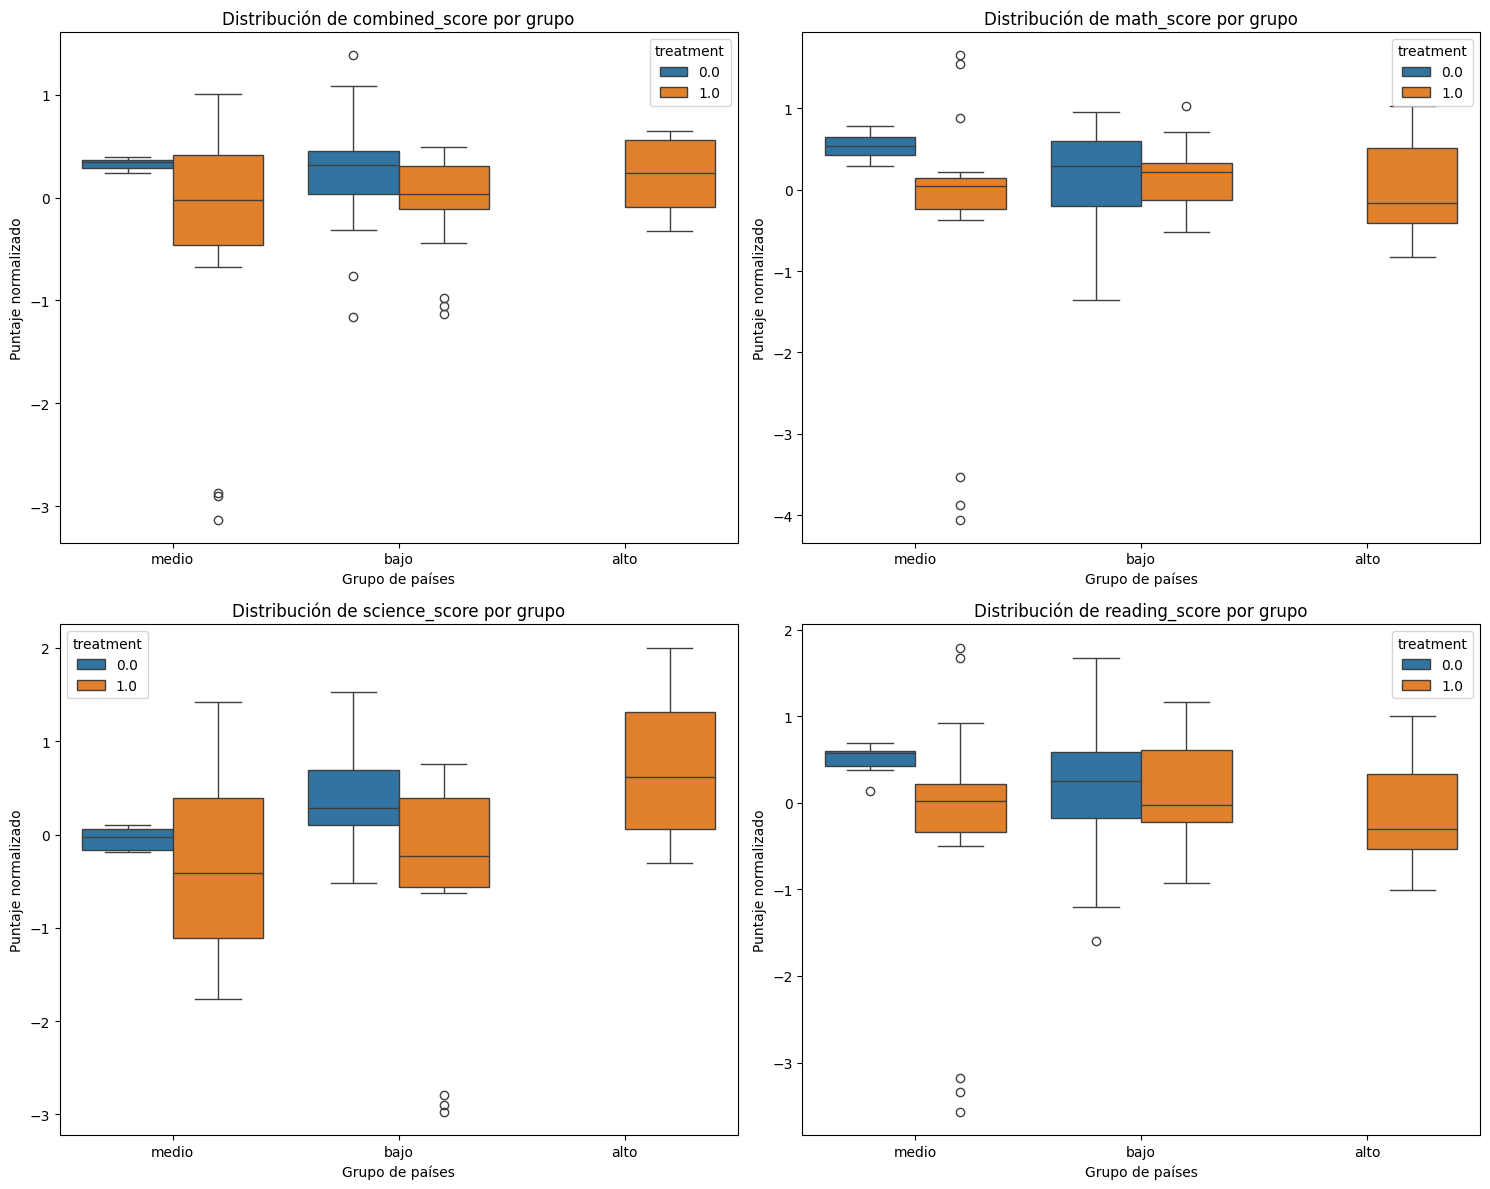

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

def create_country_groups(data):
    # Crear DataFrame con características para clustering
    country_features = data.groupby('country').agg({
        'gdp': 'first',
        'population': 'first'
    }).reset_index()
    
    # Normalizar características
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(
        country_features[['gdp', 'population']]
    )
    
    # Aplicar K-means clustering (3 grupos)
    kmeans = KMeans(n_clusters=3, random_state=42)
    country_features['group'] = kmeans.fit_predict(features_scaled)
    
    # Etiquetar grupos según PIB promedio
    group_gdp = country_features.groupby('group')['gdp'].mean()
    group_mapping = {
        group: label for group, label in 
        zip(group_gdp.index, ['bajo', 'medio', 'alto'])
    }
    country_features['group_label'] = country_features['group'].map(group_mapping)
    
    return country_features[['country', 'group_label']]

def run_did_by_group(data, country_groups):
    # Combinar datos con grupos
    data_with_groups = data.merge(country_groups, on='country')
    results = {}
    
    # Análisis por grupo
    for group in data_with_groups['group_label'].unique():
        group_data = data_with_groups[data_with_groups['group_label'] == group]
        
        # Verificar si hay suficientes observaciones
        if len(group_data) < 10:
            print(f"Grupo {group} tiene muy pocas observaciones")
            continue
            
        # Preparar variables para el modelo
        X = pd.DataFrame({
            'treatment': group_data['treatment'],
            'post': group_data['post'],
            'did': group_data['did'],
            'gdp': group_data['gdp'],
            'population': group_data['population'],
            'constant': 1
        })
        
        # Correr modelo para cada outcome
        group_results = {}
        for outcome in ['combined_score', 'math_score', 'science_score', 'reading_score']:
            model = sm.OLS(group_data[outcome], X)
            group_results[outcome] = model.fit(
                cov_type='cluster', 
                cov_kwds={'groups': group_data['country']}
            )
            
        results[group] = group_results
    
    return results

def plot_treatment_effects(data, country_groups):
    # Combinar datos con grupos
    data_with_groups = data.merge(country_groups, on='country')
    
    # Crear gráfico para cada materia
    subjects = ['combined_score', 'math_score', 'science_score', 'reading_score']
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, subject in enumerate(subjects):
        sns.boxplot(
            data=data_with_groups,
            x='group_label',
            y=subject,
            hue='treatment',
            ax=axes[idx]
        )
        axes[idx].set_title(f'Distribución de {subject} por grupo')
        axes[idx].set_xlabel('Grupo de países')
        axes[idx].set_ylabel('Puntaje normalizado')
    
    plt.tight_layout()
    plt.show()

# Ejecutar análisis
country_groups = create_country_groups(clean_data)
group_results = run_did_by_group(clean_data, country_groups)

# Mostrar resultados por grupo
def display_group_results(results):
    for group, group_results in results.items():
        print(f"\n=== Resultados para grupo {group} ===")
        for outcome, model in group_results.items():
            print(f"\nOutcome: {outcome}")
            print("Coeficiente DiD:", model.params['did'])
            print("Error estándar:", model.bse['did'])
            print("P-valor:", model.pvalues['did'])

display_group_results(group_results)
plot_treatment_effects(clean_data, country_groups)

In [27]:
clean_data.year.unique()

array([2015, 2018, 2022])

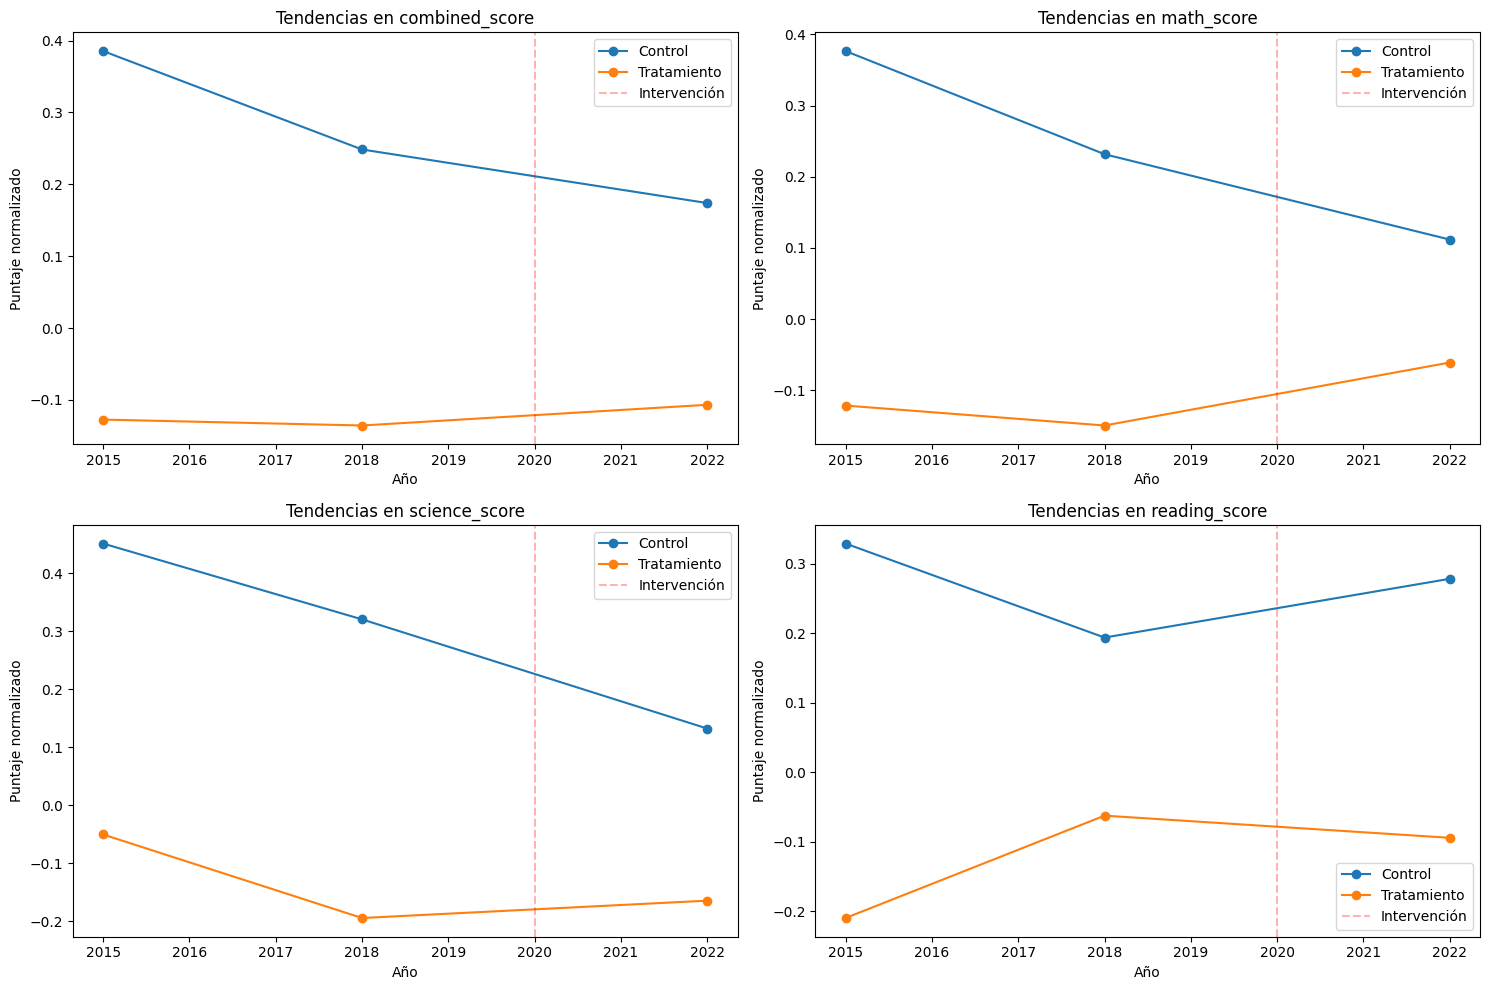

In [24]:
trends = clean_data.groupby(['year', 'treatment'])[
    ['combined_score', 'math_score', 'science_score', 'reading_score']
].mean().reset_index()

# Crear subplots para cada materia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']

for ax, outcome in zip(axes.flat, outcomes):
    for treatment in [0, 1]:
        group_data = trends[trends['treatment'] == treatment]
        ax.plot(group_data['year'], group_data[outcome], 
                marker='o', 
                label=f'{"Tratamiento" if treatment==1 else "Control"}')
        
    ax.axvline(x=2020, color='r', linestyle='--', alpha=0.3, 
                label='Intervención')
    ax.set_title(f'Tendencias en {outcome}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Puntaje normalizado')
    ax.legend()

plt.tight_layout()
plt.show()

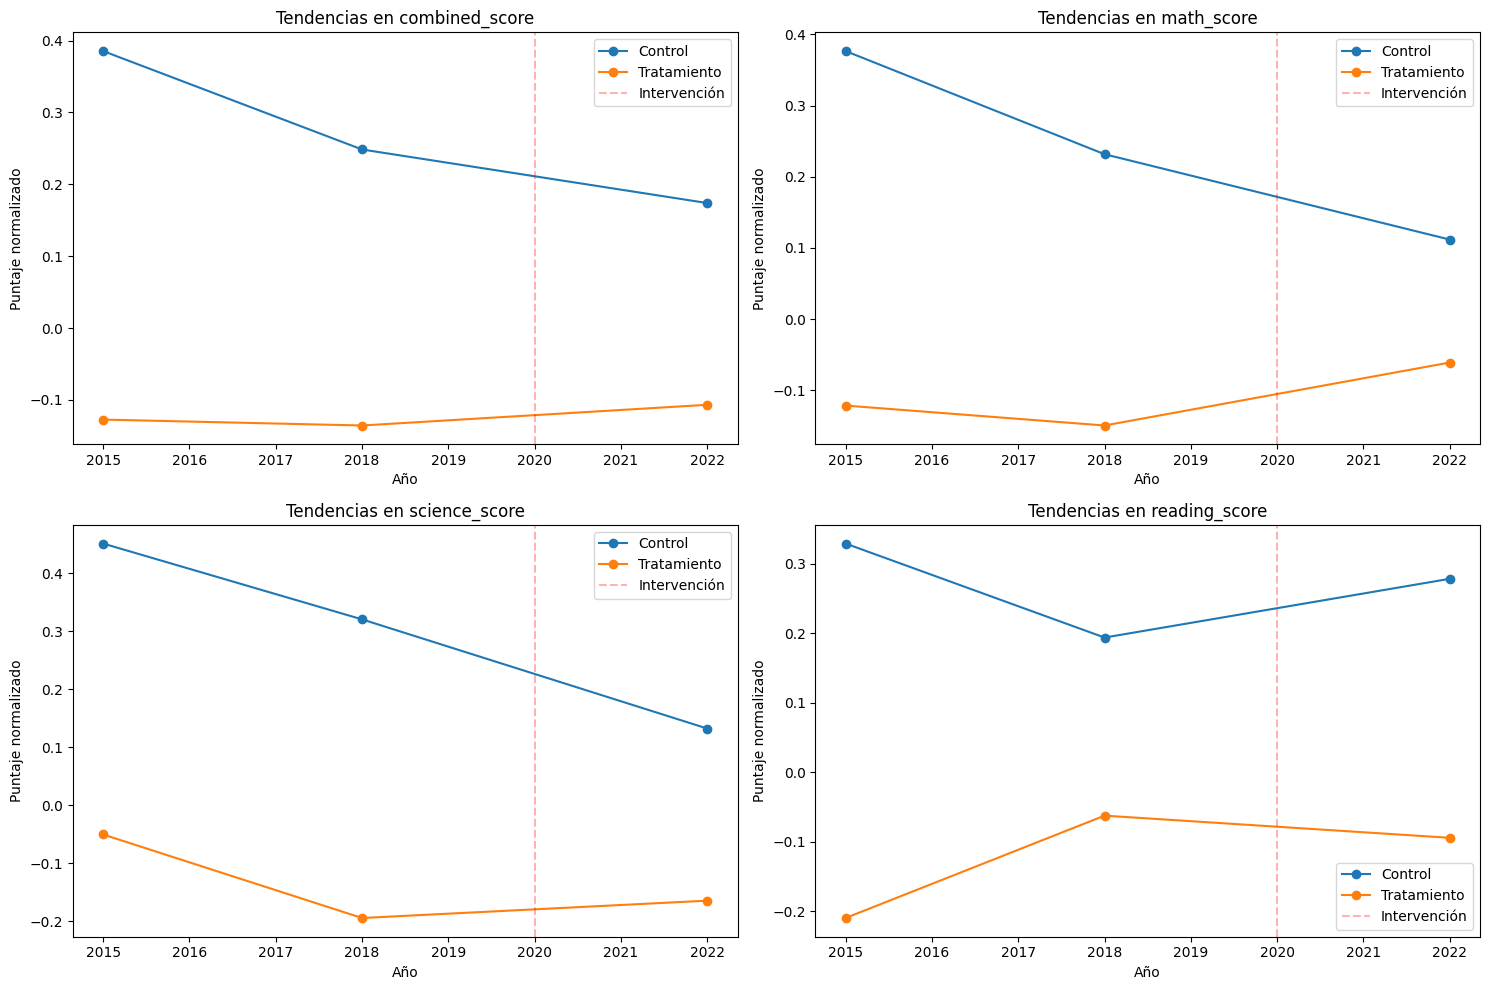

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_parallel_trends(data):
    # Calcular promedios por año y grupo de tratamiento
    trends = data.groupby(['year', 'treatment'])[
        ['combined_score', 'math_score', 'science_score', 'reading_score']
    ].mean().reset_index()
    
    # Crear subplots para cada materia
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    outcomes = ['combined_score', 'math_score', 'science_score', 'reading_score']
    
    for ax, outcome in zip(axes.flat, outcomes):
        for treatment in [0, 1]:
            group_data = trends[trends['treatment'] == treatment]
            ax.plot(group_data['year'], group_data[outcome], 
                   marker='o', 
                   label=f'{"Tratamiento" if treatment==1 else "Control"}')
            
        ax.axvline(x=2020, color='r', linestyle='--', alpha=0.3, 
                   label='Intervención')
        ax.set_title(f'Tendencias en {outcome}')
        ax.set_xlabel('Año')
        ax.set_ylabel('Puntaje normalizado')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

plot_parallel_trends(clean_data)